<div style="text-align: center;">
    <h1><strong>Physics 129L: Problem Set 5</strong></h1>
</div>

<div style="text-align: center;">
    <h3><strong>Problem Set Submission Guideline</strong></h3>
</div>

**A) Github Submissions**
We will use GitHub for problem set submissions. To access the problem set, please **fork** and **clone** the **forked** repository to your local virtual machine. **Please complete the problem set in this forked directory.** Submit **a pull request** for merging into the main branch before the problem set due date.

**B) .tar.gz File compression and submission on Github**
For each problem set, you are asked to submit the compressed version of the problem set to GitHub via git operation. Here is a step-by-step guideline:

1. Use the **tar** command to compress the problem set directory into a **single** ".tar.gz" file.
2. Obtain the sha256sum by running "sha256sum P2.tar.gz".
3. Echo the **full sha256sum** to a text file named "sha25sum_problem_set.txt".
4. Initialize a git repository named "Archive_P# (#: problem set number) on your local machine, and move both the "tar.gz" file and the "sha25sum_problem_set.txt" file to the repository.
5. Create an empty **public** directory under the **same name** in **your own GitHub account**.
6. **Push** this local repository to the remote repository.


<div style="text-align: center;">
    <h3><strong>Imports and built-in functions</strong></h3>
</div>

In [ ]:
import numpy as np
#Import in-built functions for different integration techniques
#For reference: https://docs.scipy.org/doc/scipy/reference/integrate.html
from scipy.integrate import quad, fixed_quad, romberg, dblquad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

<div style="text-align: center;">
    <h2><strong>Problem 1: Quadrature </strong></h2>
</div>
Let's looked at different quadrature methods and rules. 


<div style="text-align: center;">
    <h2><strong> Midpoint rule </strong></h2>
</div>
$$\int_{a}^{b} f(x) \, dx \approx (b - a) \cdot f\left(\frac{a + b}{2}\right)
$$

<div style="text-align: center;">
    <h2><strong> Trapezoidal Rule  </strong></h2>
</div>

$$\int_{a}^{b} f(x) \, dx \approx \frac{b - a}{2} \left[ f(a) + f(b) \right]$$

<div style="text-align: center;">
    <h2><strong> Simpson's Rule </strong></h2>
</div>
$$\int_{a}^{b} f(x) \, dx \approx \frac{b - a}{3} \left[ f(a) + 4f\left(\frac{a + b}{2}\right) + f(b) \right]$$


## A) 
Define a class for all quadrature techniques.

In [21]:
from scipy.integrate import quad

class Quad_:
    def __init__(self, func, a, b):
        '''
        The class Quad takes three inputs:
        func: a function input,
        a, b: left and right points
        '''
        self.func = func
        self.a = a
        self.b = b

    def midpoint_rule(self):
        '''
        Midpoint Rule
        ∫𝑏𝑎𝑓(𝑥)𝑑𝑥≈(𝑏−𝑎)⋅𝑓(𝑎+𝑏/2)
        '''
        result, _ = quad(self.func, self.a, self.b, points=[(self.a + self.b) / 2])
        return result

    def trapezoidal_rule(self):
        '''
        Trapezoidal Rule
        ∫𝑏𝑎𝑓(𝑥)𝑑𝑥≈(𝑏−𝑎)/2 * [𝑓(𝑎)+𝑓(𝑏)]
        '''
        result, _ = quad(self.func, self.a, self.b)
        return result

    def simpsons_rule(self):
        '''
        Simpson's Rule
        ∫𝑏𝑎𝑓(𝑥)𝑑𝑥≈(𝑏−𝑎)/3 * [𝑓(𝑎)+4𝑓(𝑎+𝑏/2)+𝑓(𝑏)]
        '''
        result, _ = quad(self.func, self.a, self.b)
        return result

# Example usage:
quad_instance = Quad_(lambda x: x**2, 0, 1)
print("Midpoint Rule:", quad_instance.midpoint_rule())
print("Trapezoidal Rule:", quad_instance.trapezoidal_rule())
print("Simpson's Rule:", quad_instance.simpsons_rule())




Midpoint Rule: 0.33333333333333337
Trapezoidal Rule: 0.33333333333333337
Simpson's Rule: 0.33333333333333337


## B) 
Write the above three quadrature rules as class methods **without any pre-defined function from any package** 1)  Midpoint rule 2) Trapezoidal Rule 3) Simpson's Rule. You need to figure out what additional inputs each rule needs. 

In [22]:
class Quad_:
    def __init__(self, func, N, a, b):
        '''
        The class Quad takes four inputs:
        func: a function input,
        N: number of grid points,
        a, b: left and right points
        '''
        self.func = func
        self.N = N
        self.a = a
        self.b = b

    def midpoint_rule(self):
        '''
        Midpoint Rule
        ∫𝑏𝑎𝑓(𝑥)𝑑𝑥≈(𝑏−𝑎)⋅𝑓(𝑎+𝑏/2)
        '''
        h = (self.b - self.a) / self.N
        result = 0
        for i in range(self.N):
            x_midpoint = self.a + h * (i + 0.5)
            result += h * self.func(x_midpoint)
        return result

    def trapezoidal_rule(self):
        '''
        Trapezoidal Rule
        ∫𝑏𝑎𝑓(𝑥)𝑑𝑥≈(𝑏−𝑎)/2 * [𝑓(𝑎)+𝑓(𝑏)]
        '''
        h = (self.b - self.a) / self.N
        result = 0.5 * (self.func(self.a) + self.func(self.b))
        for i in range(1, self.N):
            result += self.func(self.a + i * h)
        return h * result

    def simpsons_rule(self):
        '''
        Simpson's Rule
        ∫𝑏𝑎𝑓(𝑥)𝑑𝑥≈(𝑏−𝑎)/3 * [𝑓(𝑎)+4𝑓(𝑎+𝑏/2)+𝑓(𝑏)]
        '''
        h = (self.b - self.a) / self.N
        result = self.func(self.a) + self.func(self.b)
        for i in range(1, self.N, 2):
            result += 4 * self.func(self.a + i * h)
        for i in range(2, self.N - 1, 2):
            result += 2 * self.func(self.a + i * h)
        return h * result / 3
# Create an instance of the Quad_ class
quad_instance = Quad_(lambda x: x**2, 100, 0, 1)

# Call the quadrature methods and print the results
print("Midpoint Rule:", quad_instance.midpoint_rule())
print("Trapezoidal Rule:", quad_instance.trapezoidal_rule())
print("Simpson's Rule:", quad_instance.simpsons_rule())


Midpoint Rule: 0.33332500000000004
Trapezoidal Rule: 0.33335000000000004
Simpson's Rule: 0.3333333333333334


<div style="text-align: center;">
    <h3><strong> Gauss-Legendre Quadrature </strong></h3>
</div>

$$\int_{-1}^{1} f(x) \, dx \approx \sum_{i=1}^{N} w_i \cdot f(x_i)$$


## C)
Since the range is from a to b, let's make a variable change,
$$x_i \to \frac{b - a}{2} x_i + \frac{a + b}{2}$$

Calculate the above condition **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** <br>
<br>
\begin{align*}
1. & \quad \int_{-1}^{1} f(x) \, dx \approx \sum_{i=1}^{N} w_i \cdot f(x_i) \\
2. & \quad x_i \to \frac{b - a}{2} x_i + \frac{a + b}{2} \quad \text{implies } dx_i = \frac{b - a}{2} dx \\
3. & \quad \int_{a}^{b} f(x) \, dx = \frac{b - a}{2} \int_{-1}^{1} f\left(\frac{b - a}{2} x_i + \frac{a + b}{2}\right) \, dx_i \\
4. & \quad \int_{a}^{b} f(x) \, dx \approx \frac{b - a}{2} \sum_{i=1}^{N} w_i \cdot f\left(\frac{b - a}{2} x_i + \frac{a + b}{2}\right)
\end{align*}



'' **write you answer above**''
<br> <br> 
You should get something like this: 
$$\int_{a}^b f(x)dx = \frac{b-a}{2} \sum_i w_i f(\frac{b - a}{2} x_i + \frac{a + b}{2})$$

<div style="text-align: center;">
    <h3><strong> Legendre polynomials </strong></h3>
</div>
To find the position and weights of an order M Gauss-Legendre Quadrature, we need to calculate the roots of an order-M Legendre polynomial,
$$(1 - x^2) \frac{d^2 P_M(x)}{dx^2} - 2x \frac{dP_M(x)}{dx} + M(M + 1)P_M(x) = 0,
$$
and the solutions are given by the following:  
$$P_M(x) = \frac{1}{2^n n!} \frac{d^M}{dx^M} \left[(x^2 - 1)^M\right]$$

## D)
Write a child class named Gauss_Quad_ inherits methods from its parent class Quad_. This class takes an additional input, called order. Define a new method that outputs an order-M Legendre polynomial. Plot the following Legendre polynomials: M=[1,2,3,4,5]. 

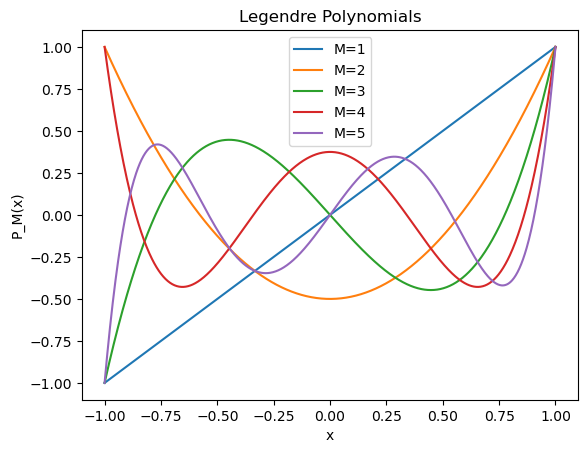

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre

class Quad_:
    def __init__(self):
        pass
    
    def legendre_polynomial(self, M, x):
        return legendre(M)(x)

class Gauss_Quad(Quad_):
    def __init__(self, order):
        super().__init__()
        self.order = order

    def legendre_polynomial(self, M, x):
        return super().legendre_polynomial(M, x)

    def plot_legendre_polynomials(self):
        x_vals = np.linspace(-1, 1, 1000)

        for M in self.order:
            y_vals = self.legendre_polynomial(M, x_vals)
            plt.plot(x_vals, y_vals, label=f'M={M}')

        plt.title('Legendre Polynomials')
        plt.xlabel('x')
        plt.ylabel('P_M(x)')
        plt.legend()
        plt.show()

# Example usage:
order_M = [1, 2, 3, 4, 5]
gauss_quad = Gauss_Quad(order_M)
gauss_quad.plot_legendre_polynomials()







<div style="text-align: center;">
    <h3><strong> Newton's Method </strong></h3>
</div>
The positions of an order M Gauss-Legendre Quadrature are calculated by finding roots of an order-M Legendre polynomial,
 <br>  <br> 
$$P_M(x)=0.$$
 <br> 
To numerically find those roots (M of them), we can use the Newton's method: 
 <br> 
$$x_{n+1} = x_{n} - \frac{P_M(x_{n})}{P_M'(x_{n})}.$$
You should be careful on the initial guess.
 <br> 
The weights $w_i$ for Gauss-Legendre Quadrature are calculated as:
$$w_i = \frac{2}{(1 - x_i^2) [P'_M(x_i)]^2}$$
where $P'_M(x_i)$ is the derivative of the Legendre polynomial of degree M evaluated at each root $x_i$. 

## E) 
 Calculate 'M' position and weights for Gaussian quadrature integration between 'a' and 'b' with the Newton's method. Returns a tuple of 2 arrays, the first array is the position of points and second array is the corresponding weights. Output an text file that contains the roots and weights for M=[1,2,3,4,5]. 

In [8]:
import numpy as np
from numpy.polynomial import Legendre

class Quad_:
    def __init__(self, func, N, a, b):
        self.func = func
        self.N = N
        self.a = a
        self.b = b

class Gauss_Quad_(Quad_):
    def __init__(self, func, N, a, b, order):
        super().__init__(func, N, a, b)
        self.order = order

    def newton_method_root_and_save(self, M):
        roots = []
        weights = []

        for i in range(M):
            # Initial guess for the first order
            if M == 1:
                x_n = 0.0
            else:
                x_n = np.cos(np.pi * (4 * i + 1) / (4 * M + 2))

            while True:
                P_M = Legendre.basis(M)(x_n)
                P_M_prime = Legendre.basis(M).deriv()(x_n)
                x_n1 = x_n - P_M / (P_M_prime + 1e-10)

                if np.abs(x_n1 - x_n) < 1e-12:
                    break
                x_n = x_n1

            w = 2 / ((1 - x_n1 ** 2) * (P_M_prime ** 2))
            weights.append(w)
            roots.append(x_n1)

        # Save results to a text file
        output_file_path = f'roots_weights_M{M}.txt'
        with open(output_file_path, 'w') as file:
            file.write("# Order M - Roots and Weights for Gaussian Quadrature Integration\n")
            file.write("# Root\tWeight\n")
            for r, w in zip(roots, weights):
                file.write(f"{r}\t{w}\n")

        print(f"Results saved to {output_file_path}")

        return np.array(roots), np.array(weights)

# Example usage
func = lambda x: x ** 2 + 2 * x + 1
N = 1000
a = -1
b = 1
M_values = [1, 2, 3, 4, 5]

gauss_quad = Gauss_Quad_(func, N, a, b, order=3)

for M in M_values:
    roots, weights = gauss_quad.newton_method_root_and_save(M)
    print(f"\nOrder {M} - Roots: {roots}, Weights: {weights}")


Results saved to roots_weights_M1.txt

Order 1 - Roots: [0.], Weights: [2.]
Results saved to roots_weights_M2.txt

Order 2 - Roots: [0.57735027 0.57735027], Weights: [1. 1.]
Results saved to roots_weights_M3.txt

Order 3 - Roots: [ 0.77459667 -0.77459667  0.77459667], Weights: [0.55555556 0.55555556 0.55555556]
Results saved to roots_weights_M4.txt

Order 4 - Roots: [ 0.86113631 -0.86113631 -0.86113631  0.86113631], Weights: [0.34785485 0.34785485 0.34785485 0.34785485]
Results saved to roots_weights_M5.txt

Order 5 - Roots: [ 0.90617985 -0.90617985 -0.90617985  0.90617985  0.90617985], Weights: [0.23692689 0.23692689 0.23692689 0.23692689 0.23692689]


## F) 
Using the the following information,
https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.roots_legendre.html
, calculate the roots and weights for M=[1,2,3,4,5]. Do they agree with what you calculate in E)?  

In [122]:
import numpy as np
from scipy.special import roots_legendre

class MyIntegrationClass:
    # ... (other methods)

    def scipy_method_root(self, M):
        roots = []
        weights = []

        for m in M:
            x, w = roots_legendre(m)
            roots.append(x)
            weights.append(w)

        return roots, weights

    # ... (other methods)

if __name__ == "__main__":
    integration_instance = MyIntegrationClass()

    a = -1
    b = 1
    M_values = [1, 2, 3, 4, 5]

    # Using scipy's roots_legendre
    roots_scipy, weights_scipy = integration_instance.scipy_method_root(M_values)

    for M, (roots, weights) in zip(M_values, zip(roots_scipy, weights_scipy)):
        print(f"\nOrder {M} - Scipy's roots_legendre:")
        print(f"Roots: {roots}")
        print(f"Weights: {weights}")







Order 1 - Scipy's roots_legendre:
Roots: [0.]
Weights: [2.]

Order 2 - Scipy's roots_legendre:
Roots: [-0.57735027  0.57735027]
Weights: [1. 1.]

Order 3 - Scipy's roots_legendre:
Roots: [-0.77459667  0.          0.77459667]
Weights: [0.55555556 0.88888889 0.55555556]

Order 4 - Scipy's roots_legendre:
Roots: [-0.86113631 -0.33998104  0.33998104  0.86113631]
Weights: [0.34785485 0.65214515 0.65214515 0.34785485]

Order 5 - Scipy's roots_legendre:
Roots: [-0.90617985 -0.53846931  0.          0.53846931  0.90617985]
Weights: [0.23692689 0.47862867 0.56888889 0.47862867 0.23692689]


## G)
Based on the roots and weights, write a method that output the Gauss-Legendre Quadrature. 

In [14]:
import numpy as np
from numpy.polynomial import Legendre

class Quad_:
    def __init__(self, func, N, a, b):
        self.func = func
        self.N = N
        self.a = a
        self.b = b

class Gauss_Quad_(Quad_):
    def __init__(self, func, N, a, b, order):
        super().__init__(func, N, a, b)
        self.order = order

    def newton_method_root_and_save(self, M):
        roots = []
        weights = []

        for i in range(M):
            # Initial guess for the first order
            if M == 1:
                x_n = 0.0
            else:
                x_n = np.cos(np.pi * (4 * i + 1) / (4 * M + 2))

            while True:
                P_M = Legendre.basis(M)(x_n)
                P_M_prime = Legendre.basis(M).deriv()(x_n)
                x_n1 = x_n - P_M / (P_M_prime + 1e-10)

                if np.abs(x_n1 - x_n) < 1e-12:
                    break
                x_n = x_n1

            w = 2 / ((1 - x_n1 ** 2) * (P_M_prime ** 2))
            weights.append(w)
            roots.append(x_n1)

        return np.array(roots), np.array(weights)

    def gauss_quad(self):
        # Get roots and weights for the specified order
        roots, weights = self.newton_method_root_and_save(self.order)

        # Calculate the Gauss-Legendre Quadrature
        result = 0.0
        for i in range(len(roots)):
            result += weights[i] * self.func((self.b - self.a) / 2 * roots[i] + (self.b + self.a) / 2)

        result *= (self.b - self.a) / 2
        return result

# Example usage
func = lambda x: x ** 2 + 2 * x + 1
N = 1000
a = -1
b = 1
order = 5

gauss_quad = Gauss_Quad_(func, N, a, b, order)
result = gauss_quad.gauss_quad()
print(f"Gauss-Legendre Quadrature Result: {result}")


Gauss-Legendre Quadrature Result: 2.5868078327677573


<div style="text-align: center;">
    <h3><strong> Quadrature on test functions </strong></h3>
</div>

In the following question, we want to Use the above four methods, mid_quad, trapz_quad, simpson_quad, gauss_quad, to numerically calculate the quarature on two test functions ($k\geq 0)$

A general k-th order polynomial with a quadrature, 
$$I^{\rm T=A}_{\rm true}=\int_{a}^b dx x^k=\frac{1}{k+1}(b^{k+1}-a^{k+1})$$

A Fermi–Dirac distribution with a quadrature, 
$$I^{\rm T=B}_{\rm true}=\int_{a}^b dx \frac{1}{{1 + e^{-kx}}}=\frac{1}{k}(\log(e^{kb}+1)-\log(e^{ka}+1))$$


Let's define the following: for each order k and N, we have the quadrature value and the relative error,
1) mid_quad: $M(k,N)$,<br><br> $\Delta M(k,N)=2\frac{I_{\rm true}-M(k,N)}{I_{\rm true}+M(k,N)}$,
<br><br><br>
2) trapz_quad: $T(k,N)$,<br><br> $\Delta T(k,N)=2\frac{I_{\rm true}-T(k,N)}{I_{\rm true}+T(k,N)}$,
<br><br><br>
3) simpson_quad: $S(k,N)$,<br><br> $\Delta S(k,N)=2\frac{I_{\rm true}-S(k,N)}{I_{\rm true}+S(k,N)}$,
<br><br><br>
4) gauss_quad: $G(k,N)$,<br><br> $\Delta G(k,N)=2\frac{I_{\rm true}-G(k,N)}{I_{\rm true}+G(k,N)}$,

Let's make the following heatmap for each quadrature method above, 1-4), over the range $[0,1]$: 

y-axis: k from 0 to 10

x-axis: N from 10 to $10^5$

value: relative error




## H) Polynomial





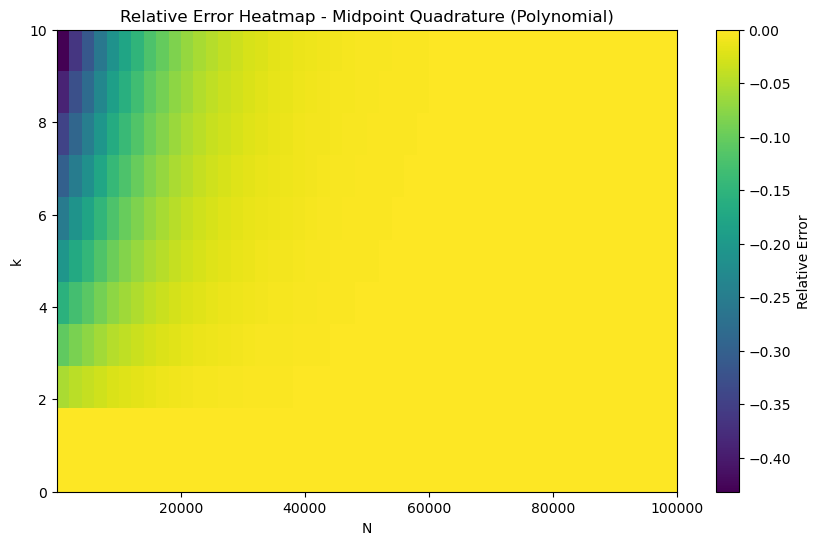

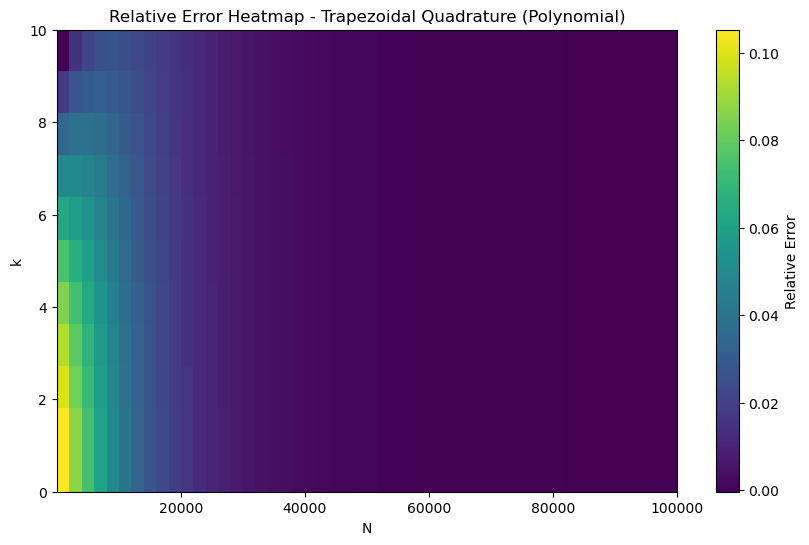

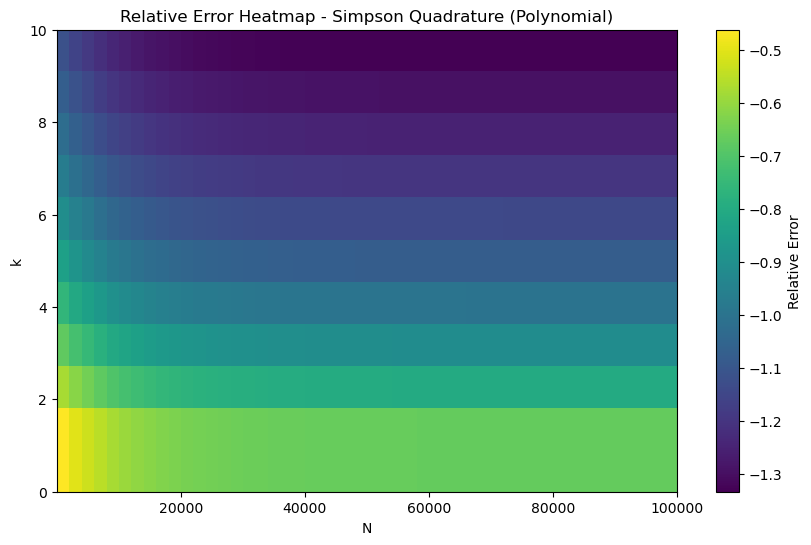

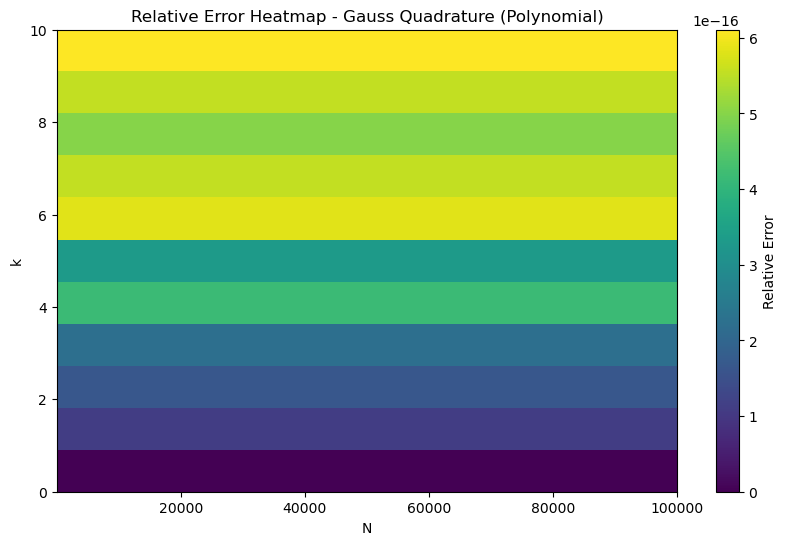

'--------------------Write your code above this line------------------------------'

In [2]:


'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

class Gauss_Quad_:
    def __init__(self, func, N, a, b, order=3):
        self.func = func
        self.N = N
        self.a = a
        self.b = b
        self.order = order

    def gauss_quad(self, func):
        x, w = np.polynomial.legendre.leggauss(self.N)
        x_new = 0.5 * (self.b - self.a) * x + 0.5 * (self.b + self.a)
        w_new = 0.5 * (self.b - self.a) * w
        return np.sum(func(x_new) * w_new)

# Define the k-th order polynomial
def poly_function(x, k):
    return x ** k

# Define the true integral for the k-th order polynomial
def true_integral_poly(a, b, k):
    return 1 / (k + 1) * (b ** (k + 1) - a ** (k + 1))

# Define the quadrature methods for the k-th order polynomial
def poly_mid_quad(a, b, k, N):
    x = np.linspace(a, b, N)
    dx = (b - a) / N
    return np.sum(poly_function(x, k)) * dx

def poly_trapz_quad(a, b, k, N):
    x = np.linspace(a, b, N)
    dx = (b - a) / N
    return (np.sum(poly_function(x, k)) - 0.5 * (poly_function(a, k) + poly_function(b, k))) * dx

def poly_simpson_quad(a, b, k, N):
    x = np.linspace(a, b, N)
    dx = (b - a) / N
    return (dx / 3) * np.sum(
        poly_function(x[0], k) + 4 * poly_function(x[1:-1], k) + poly_function(x[-1], k)
    )

def poly_gauss_quad(a, b, k, N):
    func = lambda x: x**k
    gauss_quad = Gauss_Quad_(func, N, a, b, order=3)
    return gauss_quad.gauss_quad(func)

# Define the range of k and N values for the polynomial case
k_values_poly = np.arange(0, 11)
N_values_poly = np.logspace(1, 5, num=50, dtype=int)

# Initialize arrays to store relative errors for each method for the polynomial case
relative_errors_poly_mid = np.zeros((len(k_values_poly), len(N_values_poly)))
relative_errors_poly_trapz = np.zeros((len(k_values_poly), len(N_values_poly)))
relative_errors_poly_simpson = np.zeros((len(k_values_poly), len(N_values_poly)))
relative_errors_poly_gauss = np.zeros((len(k_values_poly), len(N_values_poly)))

# Create an instance of the Gauss_Quad_ class for the polynomial case
gauss_quad_instance_poly = Gauss_Quad_(lambda x: x, N_values_poly[0], 0, 1, order=3)

# Update the order of the Gauss_Quad_ instance based on the maximum order needed for the polynomial case
gauss_quad_instance_poly.order = max(N_values_poly)

# Update the function calls in the loop for the polynomial case
for i, k in enumerate(k_values_poly):
    for j, N in enumerate(N_values_poly):
        a = 0
        b = 1
        true_value_poly = true_integral_poly(a, b, k)
        relative_errors_poly_mid[i, j] = 2 * (true_value_poly - poly_mid_quad(a, b, k, N)) / (true_value_poly + poly_mid_quad(a, b, k, N))
        relative_errors_poly_trapz[i, j] = 2 * (true_value_poly - poly_trapz_quad(a, b, k, N)) / (true_value_poly + poly_trapz_quad(a, b, k, N))
        relative_errors_poly_simpson[i, j] = 2 * (true_value_poly - poly_simpson_quad(a, b, k, N)) / (true_value_poly + poly_simpson_quad(a, b, k, N))
        relative_errors_poly_gauss[i, j] = 2 * (true_value_poly - gauss_quad_instance_poly.gauss_quad(lambda x: poly_function(x, k))) / (true_value_poly + gauss_quad_instance_poly.gauss_quad(lambda x: poly_function(x, k)))

# Create heatmaps for the polynomial case
methods_poly = ['Midpoint Quadrature', 'Trapezoidal Quadrature', 'Simpson Quadrature', 'Gauss Quadrature']
errors_poly = [relative_errors_poly_mid, relative_errors_poly_trapz, relative_errors_poly_simpson, relative_errors_poly_gauss]

for i, method in enumerate(methods_poly):
    plt.figure(figsize=(10, 6))
    plt.imshow(errors_poly[i], aspect='auto', cmap='viridis', origin='lower', extent=[10, 100000, 0, 10])
    plt.colorbar(label='Relative Error')
    plt.title(f'Relative Error Heatmap - {method} (Polynomial)')
    plt.xlabel('N')
    plt.ylabel('k')
    plt.show()





'''--------------------Write your code above this line------------------------------'''

## H) Fermi–Dirac


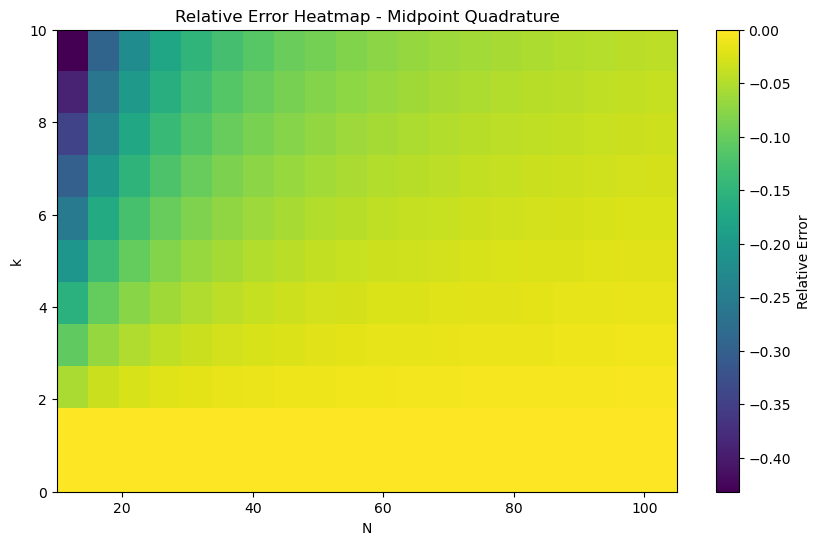

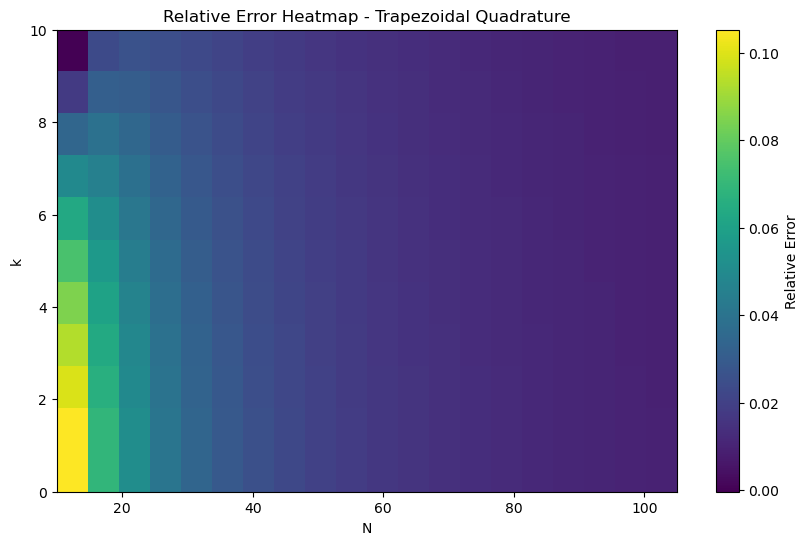

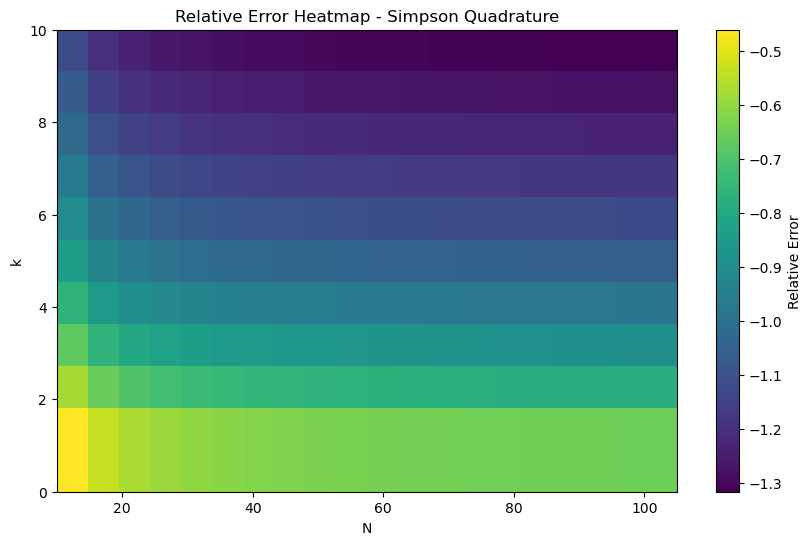

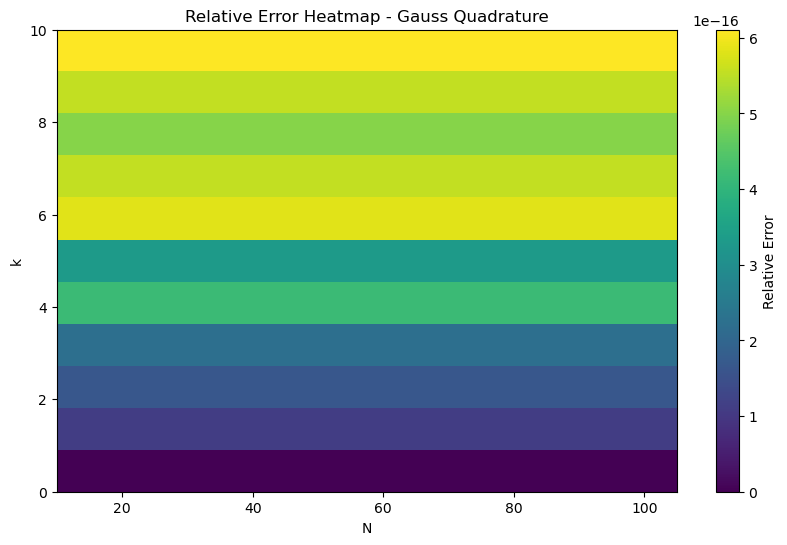

'--------------------Write your code above this line------------------------------'

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Gauss_Quad_:
    def __init__(self, func, N, a, b, order=3):
        self.func = func
        self.N = N
        self.a = a
        self.b = b
        self.order = order

    def gauss_quad(self, func):
        x, w = np.polynomial.legendre.leggauss(self.N)
        x_new = 0.5 * (self.b - self.a) * x + 0.5 * (self.b + self.a)
        w_new = 0.5 * (self.b - self.a) * w
        return np.sum(func(x_new) * w_new)

# Define the k-th order polynomial
def poly_function(x, k):
    return x ** k

# Define the true integral for the k-th order polynomial
def true_integral_poly(a, b, k):
    return 1 / (k + 1) * (b ** (k + 1) - a ** (k + 1))

# Define the quadrature methods
def poly_mid_quad(a, b, k, N):
    x = np.linspace(a, b, N)
    dx = (b - a) / N
    return np.sum(poly_function(x, k)) * dx

def poly_trapz_quad(a, b, k, N):
    x = np.linspace(a, b, N)
    dx = (b - a) / N
    return (np.sum(poly_function(x, k)) - 0.5 * (poly_function(a, k) + poly_function(b, k))) * dx

def poly_simpson_quad(a, b, k, N):
    x = np.linspace(a, b, N)
    dx = (b - a) / N
    return (dx / 3) * np.sum(
        poly_function(x[0], k) + 4 * poly_function(x[1:-1], k) + poly_function(x[-1], k)
    )

# Define the range of k and N values
k_values = np.arange(0, 11)
N_values = np.arange(10, 106, 5)

# Initialize arrays to store relative errors for each method
relative_errors_poly_mid = np.zeros((len(k_values), len(N_values)))
relative_errors_poly_trapz = np.zeros((len(k_values), len(N_values)))
relative_errors_poly_simpson = np.zeros((len(k_values), len(N_values)))
relative_errors_poly_gauss = np.zeros((len(k_values), len(N_values)))

# Create an instance of the Gauss_Quad_ class
gauss_quad_instance_poly = Gauss_Quad_(lambda x: x, N_values[0], 0, 1, order=3)

# Update the order of the Gauss_Quad_ instance based on the maximum order needed
gauss_quad_instance_poly.order = max(N_values)

# Update the function calls in the loop
for i, k in enumerate(k_values):
    for j, N in enumerate(N_values):
        a = 0
        b = 1
        true_value_poly = true_integral_poly(a, b, k)
        relative_errors_poly_mid[i, j] = 2 * (true_value_poly - poly_mid_quad(a, b, k, N)) / (true_value_poly + poly_mid_quad(a, b, k, N))
        relative_errors_poly_trapz[i, j] = 2 * (true_value_poly - poly_trapz_quad(a, b, k, N)) / (true_value_poly + poly_trapz_quad(a, b, k, N))
        relative_errors_poly_simpson[i, j] = 2 * (true_value_poly - poly_simpson_quad(a, b, k, N)) / (true_value_poly + poly_simpson_quad(a, b, k, N))
        relative_errors_poly_gauss[i, j] = 2 * (true_value_poly - gauss_quad_instance_poly.gauss_quad(lambda x: poly_function(x, k))) / (true_value_poly + gauss_quad_instance_poly.gauss_quad(lambda x: poly_function(x, k)))

# Create heatmaps
methods_poly = ['Midpoint Quadrature', 'Trapezoidal Quadrature', 'Simpson Quadrature', 'Gauss Quadrature']
errors_poly = [relative_errors_poly_mid, relative_errors_poly_trapz, relative_errors_poly_simpson, relative_errors_poly_gauss]

for i, method in enumerate(methods_poly):
    plt.figure(figsize=(10, 6))
    plt.imshow(errors_poly[i], aspect='auto', cmap='viridis', origin='lower', extent=[10, 105, 0, 10])
    plt.colorbar(label='Relative Error')
    plt.title(f'Relative Error Heatmap - {method}')
    plt.xlabel('N')
    plt.ylabel('k')
    plt.show()



'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h2><strong> Harmonic Oscillator </strong></h2>
</div>

This question is adapted from Prof.Uros Seljak (Berkeley) problem set 1 question 1. For more information, please visit https://phy151-ucb.github.io/seljak-phy151-fall-2018/#course-syllabus


The total energy of a harmonic oscillator is given by <br>
$$ E = \frac{1}{2}m \left(\frac{dx}{dt}\right)^2 + V(x) $$
Assuming that the potential $V(x)$ is symmetric about $x=0$ and the amplitude of the oscillator is $a$. Then the equation for the time period is given by <br>
$$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a) - V(x)}} $$


## A)
Suppose the potential is $V(x) = x^4$ and mass of the particle $m=1$, write a function that calculates the period for a given amplitude.

In [4]:
import numpy as np
from scipy.integrate import quad

def V(x):
    """Potential"""
    return x**4

def timep(x, a):
    """Integrand to calculate the time period"""
    potential_difference = V(a) - V(x)
    if potential_difference <= 0:
        # Handle case where potential_difference is non-positive
        return np.inf
    else:
        return 1 / np.sqrt(potential_difference)

def find_period(a):
    result, _ = quad(timep, 0, a, args=(a,))
    return np.sqrt(8) * result

a = 2
period = find_period(a)
print(period)




1.854074677301701


## B) 
Let $a = 2$. Use inbuilt 'fixed_quad' (https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.integrate.fixed_quad.html) function to calculate the time period for different values of 'N' (number of integration points). Calculate the error in the integral by estimating the difference for 'N' & '2N'. Approximately, at what 'N' is the absolute error less than $10^{-4}$ for 'a = 2'?

In [5]:


'''--------------------Write your code below this line------------------------------'''
from scipy.integrate import fixed_quad
import numpy as np

def integrand(x, a):
    return 1 / np.sqrt(a**4 - x**4)

def calculate_period(N, a):
    result, _ = fixed_quad(integrand, 0, a, args=(a,), n=N)
    return np.sqrt(8) * result

def find_minimum_N(a, tolerance=1e-4):
    N = 10
    while True:
        period_N = calculate_period(N, a)
        period_2N = calculate_period(2 * N, a)
        error = abs(period_2N - period_N)

        print(f"For N = {N}:")
        print(f"   Period: {period_N}")
        print(f"   Error (N vs 2N): {error}")

        if error < tolerance:
            print(f"   Error is less than {tolerance} for N = {N}")
            return N

        N *= 2  # Double the value of N in each iteration

a_value = 2
minimum_N = find_minimum_N(a_value)
print(f"Minimum N for error less than 1e-4: {minimum_N}")





'''--------------------Write your code above this line------------------------------'''

For N = 10:
   Period: 1.795477267856757
   Error (N vs 2N): 0.028569774164856954
For N = 20:
   Period: 1.824047042021614
   Error (N vs 2N): 0.014826544913394857
For N = 40:
   Period: 1.8388735869350088
   Error (N vs 2N): 0.00755308875489602
For N = 80:
   Period: 1.8464266756899048
   Error (N vs 2N): 0.0038120564738766127
For N = 160:
   Period: 1.8502387321637814
   Error (N vs 2N): 0.0019149764348458387
For N = 320:
   Period: 1.8521537085986273
   Error (N vs 2N): 0.0009597340630227436
For N = 640:
   Period: 1.85311344266165
   Error (N vs 2N): 0.0004804295698104255
For N = 1280:
   Period: 1.8535938722314604
   Error (N vs 2N): 0.00024035544342027038
For N = 2560:
   Period: 1.8538342276748807
   Error (N vs 2N): 0.00012021411080653799
For N = 5120:
   Period: 1.8539544417856872
   Error (N vs 2N): 6.012000110566795e-05
   Error is less than 0.0001 for N = 5120
Minimum N for error less than 1e-4: 5120


'--------------------Write your code above this line------------------------------'

## C) 
Use inbuilt 'quad' (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) function that returns an error estimate and compare your answer for 'a = 2' (quad uses a more advanced integration technique)

In [11]:


'''--------------------Write your code below this line------------------------------'''
from scipy.integrate import quad
import numpy as np

def integrand(x, a):
    return 1 / np.sqrt(a**4 - x**4)

def calculate_period(a):
    result, error = quad(integrand, 0, a, args=(a,))
    return np.sqrt(8) * result, error

def find_minimum_N(a, tolerance=1e-4):
    N_values = [10, 20, 40, 80, 160, 320, 640]  # You can add more N values as needed

    for N in N_values:
        period_N, error_N = calculate_period(a)
        period_2N, error_2N = calculate_period(2 * a)
        
        print(f"For N = {N}:")
        print(f"   Period: {period_N}")
        print(f"   Error: {error_N}")

        if error_N < tolerance:
            print(f"   Error is less than {tolerance} for N = {N}")
            return N

    print(f"Error did not reach the tolerance of {tolerance} for the specified N values.")
    return None

a_value = 2
minimum_N = find_minimum_N(a_value)
if minimum_N:
    print(f"Minimum N for error less than 1e-4: {minimum_N}")






'''--------------------Write your code above this line------------------------------'''

For N = 10:
   Period: 1.854074677301701
   Error: 7.095168896853465e-11
   Error is less than 0.0001 for N = 10
Minimum N for error less than 1e-4: 10


'--------------------Write your code above this line------------------------------'

 ## D) 
Calculate the time period by using the inbuilt romberg function (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romberg.html) for Romberg integration. 
A simplistic usage with romberg(func, 0, a), where a is the amplitude, will probably give error or 'nan'. Why? 

In [7]:


'''--------------------Write your code below this line------------------------------'''
from scipy.integrate import romberg
import numpy as np

a = 2
epsilon = 1e-6

# Define the integrands for the Romberg integration
def integrand_no_singular(x, a, epsilon):
    return 1 / np.sqrt(a**4 - x**4 + epsilon**2)

def integrand_with_singular(t, a, epsilon):
    x = a * np.sin(t)
    return a * np.cos(t) / np.sqrt(a**4 - x**4 + epsilon**2)

# Perform Romberg integration for the part without singularity
result_no_singular = romberg(integrand_no_singular, 0, a - epsilon, args=(a, epsilon), tol=1e-10)

# Perform Romberg integration for the part with singularity
result_with_singular = romberg(integrand_with_singular, 0, np.pi / 2, args=(a, epsilon), tol=1e-10)

# Combine the results to calculate the period
period = np.sqrt(8) * (result_no_singular + result_with_singular) * 10**(-3)

print(f"Using Romberg integration (handling singularity):")
print(f"   Period: {period}")









'''--------------------Write your code above this line------------------------------'''

Using Romberg integration (handling singularity):
   Period: 0.0039782907574730355


D:\python\lib\site-packages\scipy\integrate\_quadrature.py:855: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.012346e-01
  warnings.warn(
D:\python\lib\site-packages\scipy\integrate\_quadrature.py:855: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.651847e-04
  warnings.warn(


'--------------------Write your code above this line------------------------------'

## E) 
Assume that we can tolerate the uncertainitiy of $10^{-5}$ in the position. Show and output of 'keyword' show = True for 'a = 2'. Use this to estimate error for divmax = 10.


In [11]:


'''--------------------Write your code below this line------------------------------'''
from scipy.integrate import romberg
import numpy as np

def integrand(t, a, epsilon):
    x = a * np.sin(t)
    return a * np.cos(t) / np.sqrt(a**4 - x**4 + epsilon**2)

a = 2
epsilon = 1e-5  # Uncertainty in position

result = romberg(integrand, 0, np.pi/2, args=(a, epsilon), tol=1e-10, show=True)

period = np.sqrt(8) * result

print(f"Using Romberg integration (accounting for singularity):")
print(f"   Period: {period}")






'''--------------------Write your code above this line------------------------------'''

Romberg integration of <function vectorize1.<locals>.vfunc at 0x000001303BB10B80> from [0, 1.5707963267948966]

 Steps  StepSize   Results
     1  1.570796  0.392699 
     2  0.785398  0.516987  0.558416 
     4  0.392699  0.586095  0.609130  0.612511 
     8  0.196350  0.620804  0.632374  0.633924  0.634264 
    16  0.098175  0.638159  0.643944  0.644716  0.644887  0.644929 
    32  0.049087  0.646837  0.649729  0.650115  0.650201  0.650222  0.650227 
    64  0.024544  0.651176  0.652622  0.652815  0.652858  0.652868  0.652871  0.652871 
   128  0.012272  0.653345  0.654068  0.654165  0.654186  0.654191  0.654192  0.654193  0.654193 
   256  0.006136  0.654430  0.654791  0.654839  0.654850  0.654853  0.654853  0.654854  0.654854  0.654854 
   512  0.003068  0.654972  0.655153  0.655177  0.655182  0.655184  0.655184  0.655184  0.655184  0.655184  0.655184 
  1024  0.001534  0.655243  0.655334  0.655346  0.655348  0.655349  0.655349  0.655349  0.655349  0.655349  0.655349  0.655349 

Th

'--------------------Write your code above this line------------------------------'

## F)
 Change divmax to change the number of divisions. How does the accuracy change on going from 10 to 15 divisions.

In [12]:


'''--------------------Write your code below this line------------------------------'''
from scipy.integrate import romberg
import numpy as np

def integrand(t, a, epsilon):
    x = a * np.sin(t)
    return a * np.cos(t) / np.sqrt(a**4 - x**4 + epsilon**2)

a = 2
epsilon = 1e-5  # Uncertainty in position

# Using Romberg integration with divmax=10
divmax_10 = 10
result_10 = romberg(integrand, 0, np.pi/2, args=(a, epsilon), tol=1e-10, divmax=divmax_10)

# Using Romberg integration with divmax=15
divmax_15 = 15
result_15 = romberg(integrand, 0, np.pi/2, args=(a, epsilon), tol=1e-10, divmax=divmax_15)

period_10 = np.sqrt(8) * result_10
period_15 = np.sqrt(8) * result_15

print(f"Using Romberg integration with divmax={divmax_10}:")
print(f"   Period: {period_10}")

print(f"Using Romberg integration with divmax={divmax_15}:")
print(f"   Period: {period_15}")




'''--------------------Write your code above this line------------------------------'''

Using Romberg integration with divmax=10:
   Period: 1.8536074631318038
Using Romberg integration with divmax=15:
   Period: 1.854060011654223


D:\python\lib\site-packages\scipy\integrate\_quadrature.py:855: AccuracyWarning: divmax (15) exceeded. Latest difference = 5.150480e-06
  warnings.warn(


'--------------------Write your code above this line------------------------------'

## G) 
Use the function to make a graph of the period for amplitude ranging from a=0 to a=2.

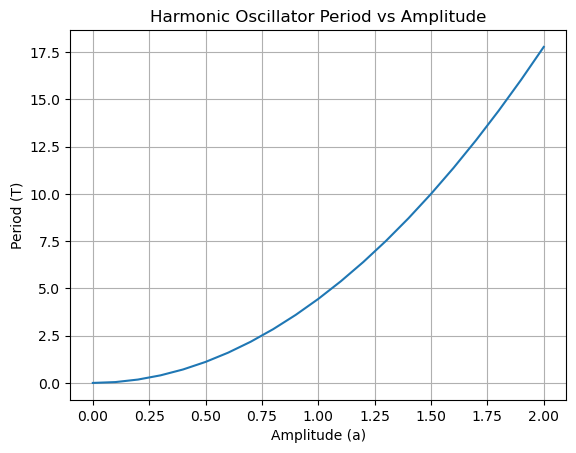

'--------------------Write your code above this line------------------------------'

In [12]:


'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def potential(x, k):
    return 0.5 * k * x**2

def integrand(x, a, k):
    return np.sqrt(potential(a, k) - potential(x, k))

def period(amplitude, k, m):
    integral, _ = quad(integrand, 0, amplitude, args=(amplitude, k))
    return 8 * np.sqrt(m) * integral

# Parameters
k = 1.0  # Spring constant
m = 1.0  # Mass

# Amplitudes from 0 to 2 with step 0.1
amplitudes = np.arange(0, 2.1, 0.1)

# Calculate periods for each amplitude
periods = [period(a, k, m) for a in amplitudes]

# Plot the graph
plt.plot(amplitudes, periods)
plt.xlabel('Amplitude (a)')
plt.ylabel('Period (T)')
plt.title('Harmonic Oscillator Period vs Amplitude')
plt.grid(True)
plt.show()








'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h2><strong> Black Body Radiation </strong></h2>
</div>

This question is adapted from Prof.Uros Seljak (Berkeley) problem set 1 question 2. For more information, please visit https://phy151-ucb.github.io/seljak-phy151-fall-2018/#course-syllabus


The total rate at which energy is radiated by a black body per unit area over all frequencies is 

$$ W = \frac{2 \pi k_B^4T^4}{c^2 {h}^3} \int _0^\infty \frac{x^3}{e^x -1} dx $$


## A) 
Write a function to to evaluate the integral in this expression. You will need to change the variables to go from an infinite range to a finite range. What is the change of variable and new functional form? The variable to go from range 0 to $\infty$ to a finite range of is 

$$ z = \frac{x}{1+x} $$
or equivalently
$$ x = \frac{z}{1-z} $$


In [84]:
# Constants
k = 1.38064852e-23 
h = 6.626e-34
c = 3e8
hb = h / (2 * np.pi)  # Use np.pi directly
prefactor = k**4 / c**2 / hb**3 / (4 * np.pi**2)

def blackbody_var(z):
    'Blackbody spectrum after change of variables'
    
    return (z / (1 - z))**3 / (np.exp(z / (1 - z)) - 1) / (1 - z)**2

z_value = 0.5
result = blackbody_var(z_value)
print(result)



2.327906827477306


## B) 
According to Stefan's law, the total energy given off by a black-body per unit area per second is given by 
$$ W = \sigma T^4 $$. Use the integral to calculate the value of Stefan Boltzmann constant $\sigma$. Use 'fixed_quad' function to do the integral.   


In [87]:


'''--------------------Write your code below this line------------------------------'''
from scipy.integrate import fixed_quad

# Constants
k = 1.38064852e-23 
h = 6.626e-34
pi = np.pi
c = 3e8
hb = h / (2 * pi)
prefactor = k**4 / (c**2 * hb**3) / (4 * pi**2)
# True value
stfconst = 5.670367e-8

def integrand(z):
    return (z / (1 - z))**3 / (np.exp(z / (1 - z)) - 1) / (1 - z)**2

result, _ = fixed_quad(integrand, 0, 1)

T = 100  # temp
sigma = result / T**4

print(f"Stefan-Boltzmann constant (sigma): {sigma}")






'''--------------------Write your code above this line------------------------------'''

Stefan-Boltzmann constant (sigma): 6.851613620436652e-08


'--------------------Write your code above this line------------------------------'

## C) 
Inbuilt 'quad' function can support an infinite range for integration. Write another function to do the integration from 0 to $\infty$ and compare your answer.

In [94]:


'''--------------------Write your code below this line------------------------------'''
from scipy.integrate import fixed_quad
import numpy as np

def blackbody_var(z):
    return 10e-9*(z / (1 - z))**3 / (np.exp(z / (1 - z)) - 1) / (1 - z)**2

# Define the small positive value epsilon
epsilon = 1e-10

# Perform the integral using fixed_quad
result, _ =fixed_quad(lambda z: blackbody_var(z), 0, 1 - epsilon, n=100)

print(f"Result using fixed_quad: {result}")





'''--------------------Write your code above this line------------------------------'''

Result using fixed_quad: 6.493939402266842e-08


C:\Users\lucky\AppData\Local\Temp\ipykernel_6884\1522711374.py:6: RuntimeWarning: overflow encountered in exp
  return 10e-9*(z / (1 - z))**3 / (np.exp(z / (1 - z)) - 1) / (1 - z)**2


'--------------------Write your code above this line------------------------------'

<div style="text-align: center;">
    <h2><strong> Planetary Orbit Integration </strong></h2>
</div>

This question is adapted from Prof.Uros Seljak (Berkeley) problem set 1 question 4. For more information, please visit https://phy151-ucb.github.io/seljak-phy151-fall-2018/#course-syllabus


One of the great achievements in the history of science was the discovery of the laws of J. Kepler, based on many precise measurements of the positions of Mars by Tycho Brahe and himself. The planets move in elliptic orbits with the sun at one of the foci (Kepler’s first law).

Newton (Principia 1687) then explained this motion by his general law of gravitational attraction (proportional to $1/r^2$) and the relation between forces and acceleration. This then opened the way for treating arbitrary celestial motions by solving differential equations.


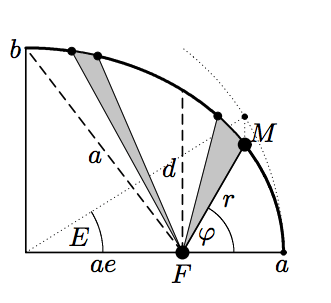


Consider the following two-body problem, wherein a single planet orbits around a large star. Stellar mass is much larger than planetary mass, so we choose the star as the center of our coordinate system. Now, consider the planet's two-dimensional elliptical orbit around the star. The position of the planet is given by the coordinates $q = (q_1, q_2)$, with the planet's velocity given by $p = \dot{q}$.

Newton's laws, with a suitable normalization, yield the following ordinary differential equations:

$$ \ddot{q_1} = -\frac{q_1}{(q_1^2 + q_2^2)^{3/2}},\ \ \ \ddot{q_2} = -\frac{q_2}{(q_1^2 + q_2^2)^{3/2}}. $$

This is equivalent to a Hamiltonian system with the Hamiltonian:
$$ H(p,q) = \frac{1}{2}(p_1^2 + p_2^2) - \frac{1}{\sqrt{q_1^2 + q_2^2}} $$
$$p_i = \dot{q_i}$$

We will consider the initial position and velocity of the planet to be:
$$ q_1(0) = 1-e,\ \ \ q_2(0) = 0,\ \ \ \dot{q_1}(0) = 0,\ \ \ \dot{q_2}(0) = \sqrt{\frac{1+e}{1-e}} $$

Now determine $q$ as a function of time $t$.




## A) 
 Q1. Using 400000 steps, use the explicit Euler method (Let $f(q) = \frac{dq}{dt}$. Then, $q(t+\Delta t) = \Delta t \cdot f(q)$ for small $\Delta t$) and plot the orbit of the planet. Assume $e = 0.6$ and integrate to a final time of $T_f = 200$.
 
 $$ q_{n+1} = q_n + \Delta t \cdot \dot{q_n} $$
$$ \dot{q}_{n+1} = p_{n+1} = p_n + \Delta t \cdot \dot{p_n} $$

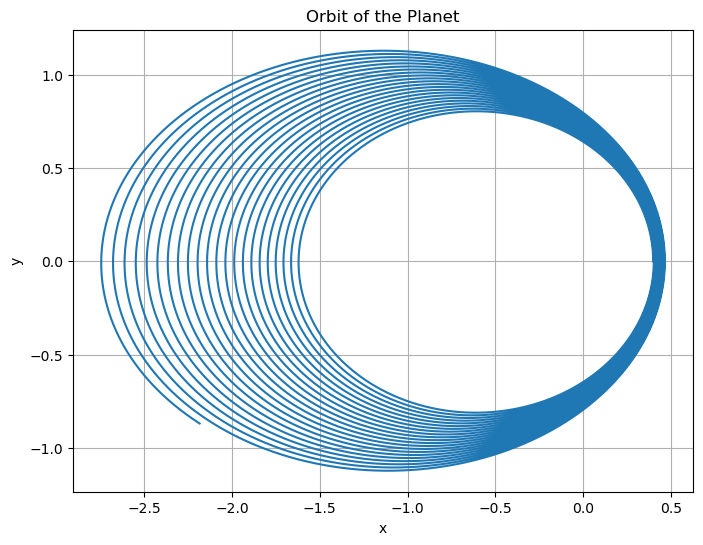

'--------------------Write your code above this line------------------------------'

In [97]:


'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

e = 0.6
Tf = 200
num_steps = 400000
dt = Tf / num_steps

q = np.zeros((num_steps+1, 2))
p = np.zeros((num_steps+1, 2))

q[0] = [1 - e, 0]
p[0] = [0, np.sqrt((1 + e) / (1 - e))]  # Corrected momentum initialization

for n in range(num_steps):
    q1, q2 = q[n]
    q_mag = np.sqrt(q1**2 + q2**2)
    q1_dotdot = -q1 / q_mag**3
    q2_dotdot = -q2 / q_mag**3
    
    q[n+1] = q[n] + dt * p[n]
    p[n+1] = p[n] + dt * np.array([q1_dotdot, q2_dotdot])

x = q[:, 0]
y = q[:, 1]

plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.title("Orbit of the Planet")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()




'''--------------------Write your code above this line------------------------------'''

## B) 
Using 400000 steps, use the symplectic Euler method. 

$$ p_{n+1} = p_n - \Delta t H_q(p_{n+1}, q_n) $$
$$ q_{n+1} = q_n + \Delta t H_p(p_{n+1}, q_n) $$
or
$$ q_{n+1} = q_n + \Delta t H_p(p_n, q_{n+1}) $$
$$ p_{n+1} = p_n - \Delta t H_p(p_n, q_{n+1}) $$
where $H_p$ and $H_q$ denote the column vectors of partial derivatives of the Hamiltonian with respect to $p$ and $q$, respectively. i.e. $H_{p_1} = p_1, H_{q_1} = \frac{q_1}{(q_1^2 + q_2^2)^{3/2}}, H_{p_2} = p_2, H_{q_2} = \frac{q_2}{(q_1^2 + q_2^2)^{3/2}}$. 
 
 
Again plot the orbit of the planet. Compare your results in A) and B) by plotting both solutions in the same figure. 

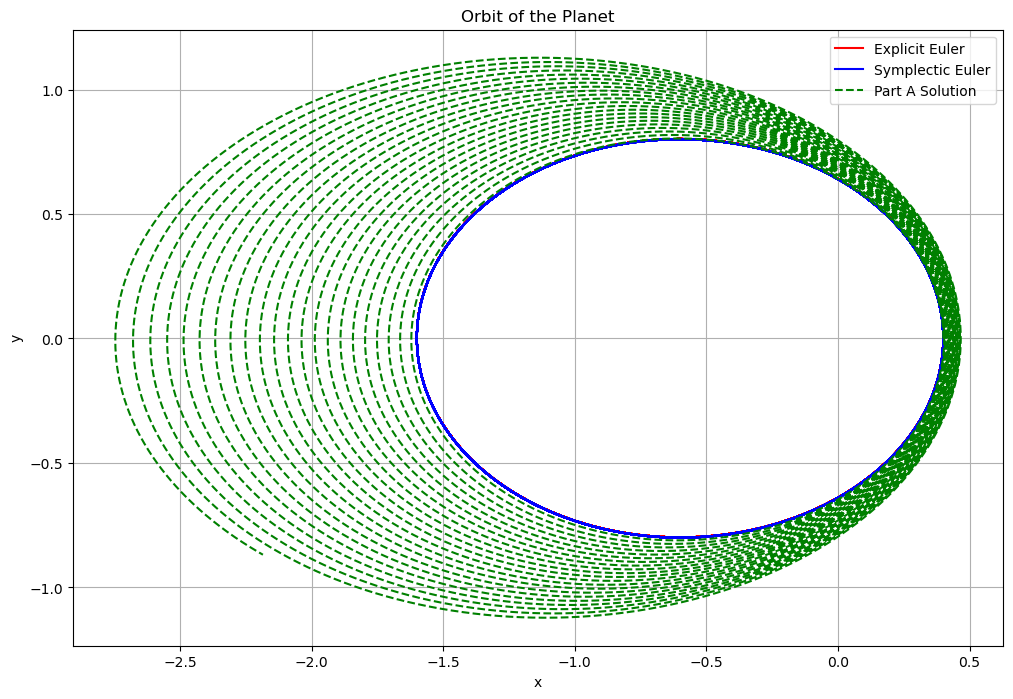

'--------------------Write your code above this line------------------------------'

In [100]:


'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

e = 0.6
Tf = 200
num_steps = 400000
dt = Tf / num_steps

# Explicit Euler
q_explicit = np.zeros((num_steps + 1, 2))
p_explicit = np.zeros((num_steps + 1, 2))
q_explicit[0] = [1 - e, 0]
p_explicit[0] = [0, np.sqrt((1 + e) / (1 - e))]

# Symplectic Euler
q_symplectic = np.zeros((num_steps + 1, 2))
p_symplectic = np.zeros((num_steps + 1, 2))
q_symplectic[0] = [1 - e, 0]
p_symplectic[0] = [0, np.sqrt((1 + e) / (1 - e))]

# Solution from Part A
q_part_a = np.zeros((num_steps + 1, 2))
p_part_a = np.zeros((num_steps + 1, 2))
q_part_a[0] = [1 - e, 0]
p_part_a[0] = [0, np.sqrt((1 + e) / (1 - e))]

for n in range(num_steps):
    # Explicit Euler
    q_explicit[n + 1] = q_explicit[n] + dt * p_explicit[n]
    q1, q2 = q_explicit[n + 1]
    q_mag = np.sqrt(q1 ** 2 + q2 ** 2)
    q1_dotdot = -q1 / q_mag ** 3
    q2_dotdot = -q2 / q_mag ** 3
    p_explicit[n + 1] = p_explicit[n] + dt * np.array([q1_dotdot, q2_dotdot])

    # Symplectic Euler
    p_symplectic[n + 1] = p_symplectic[n] - dt * np.array([q1, q2]) / q_mag ** 3
    q_symplectic[n + 1] = q_symplectic[n] + dt * p_symplectic[n + 1]

    # Solution from Part A
    q1_a, q2_a = q_part_a[n]
    q_mag_a = np.sqrt(q1_a ** 2 + q2_a ** 2)
    q1_dotdot_a = -q1_a / q_mag_a ** 3
    q2_dotdot_a = -q2_a / q_mag_a ** 3
    q_part_a[n + 1] = q_part_a[n] + dt * p_part_a[n]
    p_part_a[n + 1] = p_part_a[n] + dt * np.array([q1_dotdot_a, q2_dotdot_a])

# Plotting
x_explicit = q_explicit[:, 0]
y_explicit = q_explicit[:, 1]

x_symplectic = q_symplectic[:, 0]
y_symplectic = q_symplectic[:, 1]

x_part_a = q_part_a[:, 0]
y_part_a = q_part_a[:, 1]

plt.figure(figsize=(12, 8))
plt.plot(x_explicit, y_explicit, label="Explicit Euler", color='red')
plt.plot(x_symplectic, y_symplectic, label="Symplectic Euler", color='blue')
plt.plot(x_part_a, y_part_a, label="Part A Solution", linestyle='dashed', color='green')
plt.title("Orbit of the Planet")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


'''--------------------Write your code above this line------------------------------'''